<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [18]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [14]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [15]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

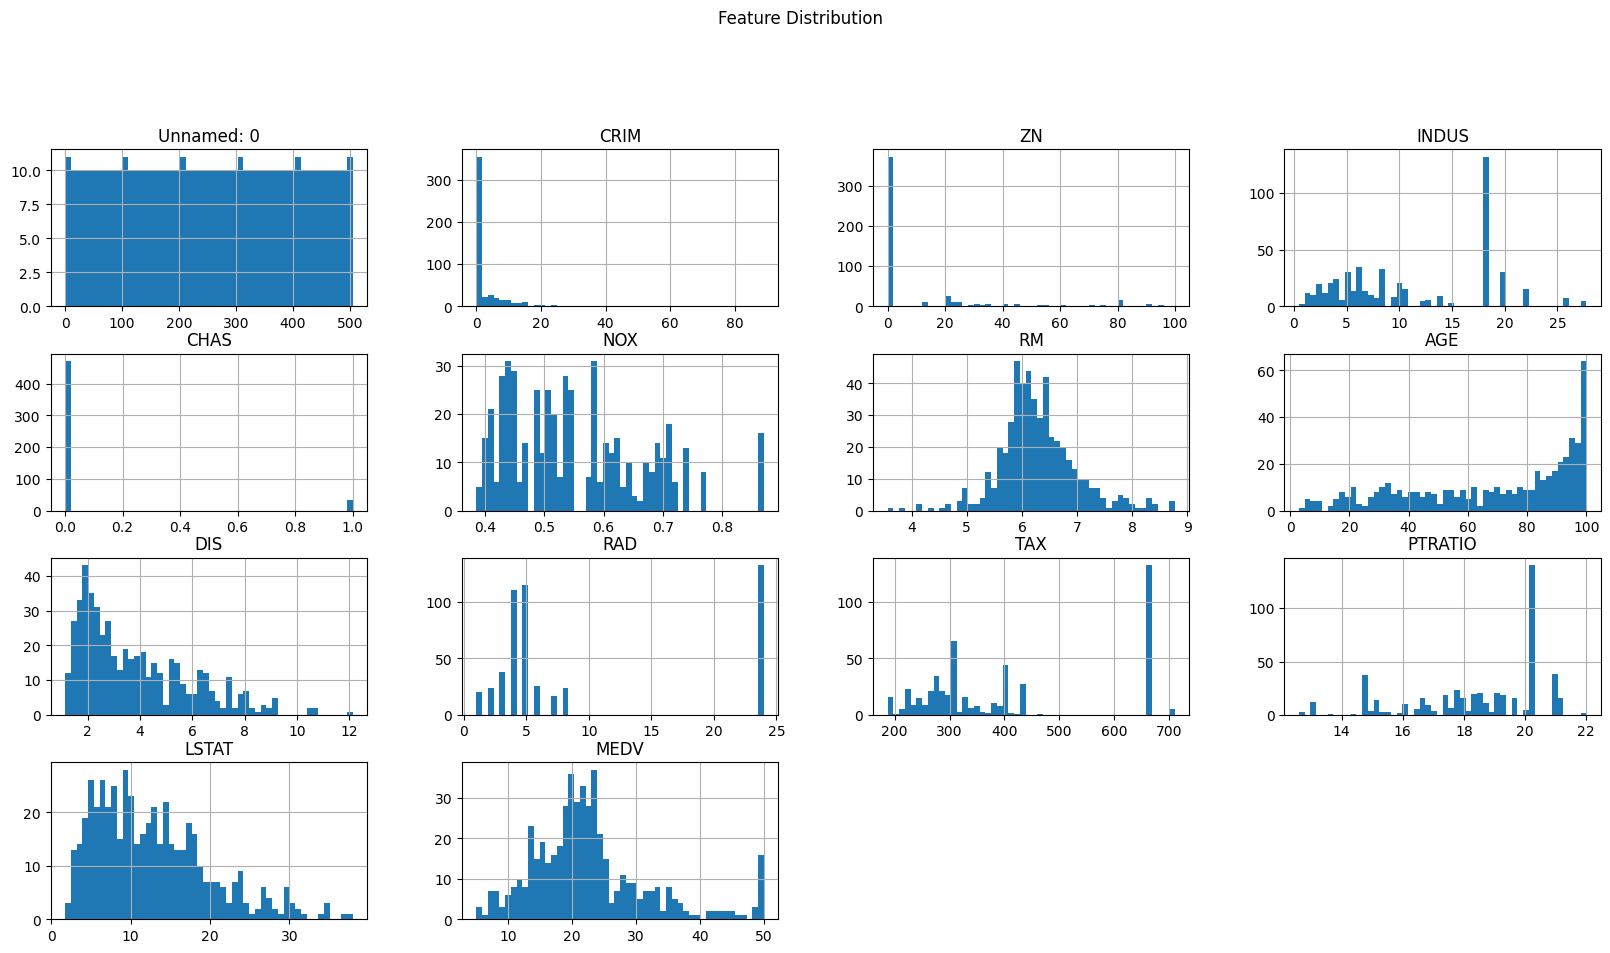

In [20]:
boston_df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout
plt.show()

Task 2: Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable



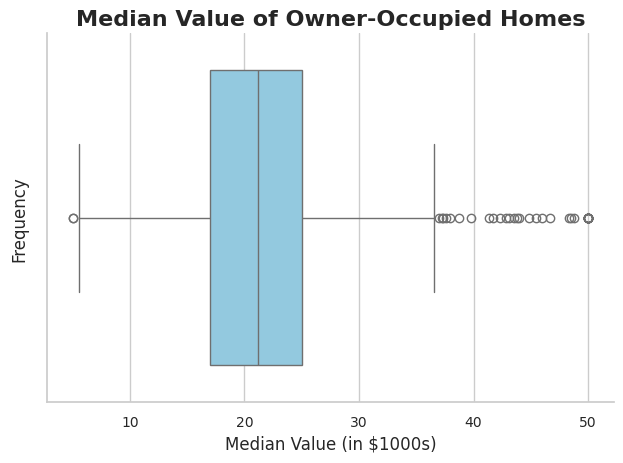

In [40]:
sns.set(style="whitegrid")

# Create the box plot with a specific color palette
ax = sns.boxplot(x='MEDV', data=boston_df, color="skyblue")

# Add title
ax.set_title('Median Value of Owner-Occupied Homes', fontsize=16, fontweight='bold')

# Set labels for axes
ax.set_xlabel('Median Value (in $1000s)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Customize the appearance
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove the top and right spines for a cleaner look
sns.despine()

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
     



From the plot:

The median value of owner-occupied homes is approximately $21 000
There are numerous outliers on the higher end of the scale, indicating some homes have a median value significantly higher than the typical range.
The presence of many outliers on the higher end suggests that the distribution might be right-skewed, meaning there are a few home with significantly higher values than the rest.

Barplot for the Charles River Variable

<ipython-input-41-2057b206811b>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.ax.set_xticklabels(["Not Near River", "Near River"])


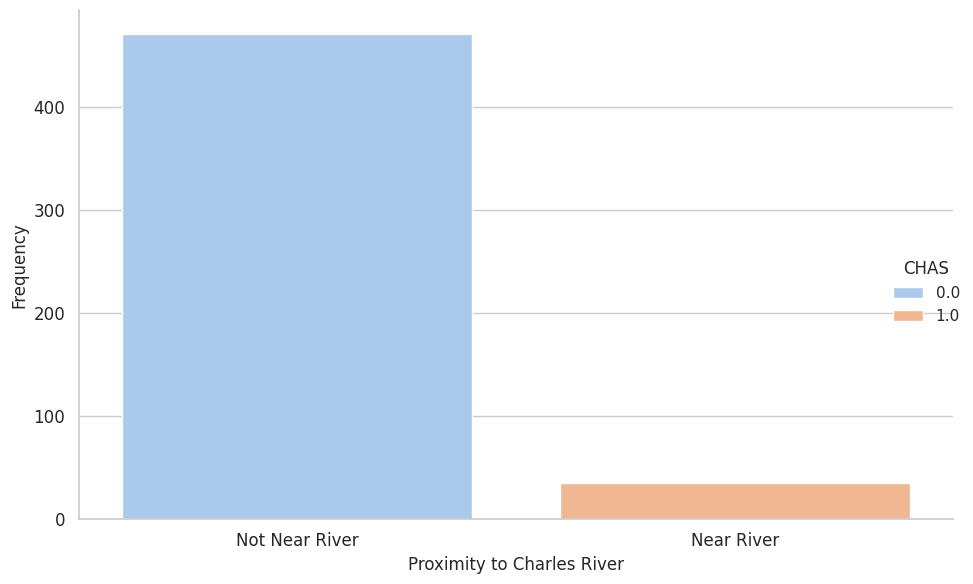

In [41]:
sns.set(style="whitegrid")

# Create the bar plot with a specific color palette and larger figure size
plot = sns.catplot(x='CHAS', kind='count', data=boston_df, palette = "pastel",hue="CHAS", height=6, aspect=1.5)

# Add the title
plot.set_titles("Frequency of Proximity to the Charles River")

# Set axis labels
plot.set_axis_labels("Proximity to Charles River", "Frequency")

# Customize the appearance of the plot
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add custom tick labels to the x-axis
plot.ax.set_xticklabels(["Not Near River", "Near River"])

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
     

From the plot:

There is a significant disparity between the number of homes near the river and those not near it.
The number of home not near the river is almost ten times greater than those near it.

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [42]:
# Categorizing 
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

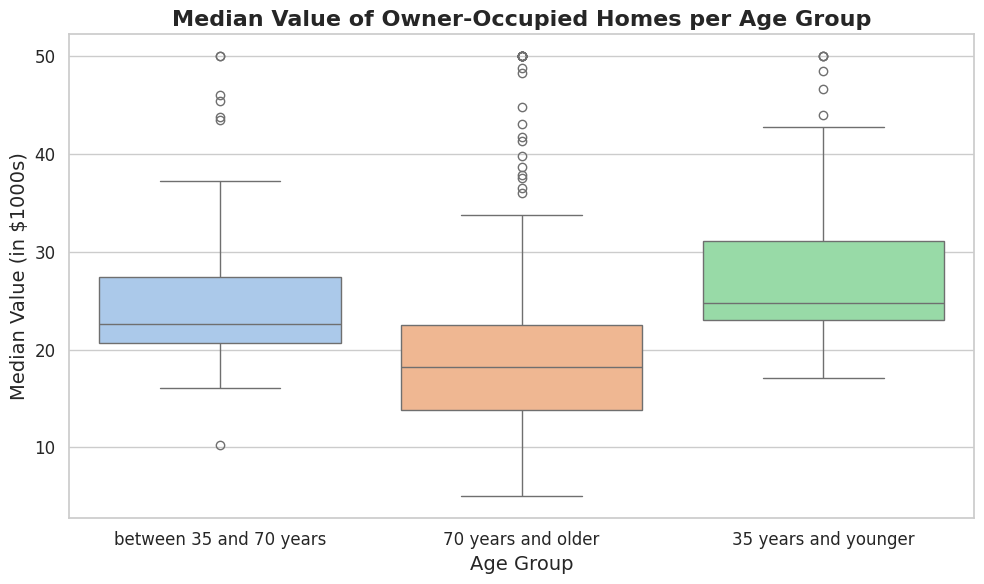

In [43]:

sns.set(style="whitegrid")

# Create the box plot with a specific color palette and larger figure size
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df, palette="pastel", hue = "age_group")

# Add the title
ax.set_title('Median Value of Owner-Occupied Homes per Age Group', fontsize=16, fontweight='bold')

# Set labels for the axes
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Median Value (in $1000s)', fontsize=14)

# Customize the appearance of the plot
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

From the plot:

Older homeowners (70 years and older) generally have homes with lower median values and less variability in their price.
Younger homeowners (35 years and younger) tend to have higher median values with more variation in price
Middle-aged homeowners (between 35 and 70 years) have median home values similar to the younger group but with a bit more consistency in their price compared to the older group.

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

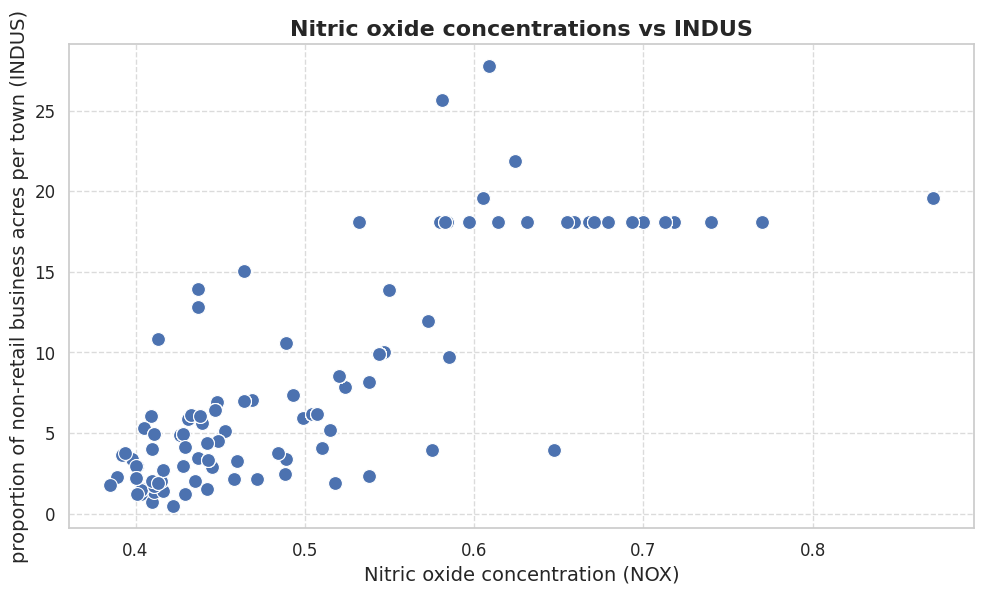

In [46]:
sns.set(style="whitegrid")

#Creating the scatter plot of the data
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df, edgecolor='w', s=100)

#Setting the title
ax.set_title('Nitric oxide concentrations vs INDUS', fontsize=16, fontweight='bold')

#Setting the labels
ax.set_xlabel('Nitric oxide concentration (NOX)', fontsize=14)
ax.set_ylabel('proportion of non-retail business acres per town (INDUS)', fontsize=14)

#Customizing the graph to look more readable
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.grid(True, linestyle='--', alpha=0.7)

#Adjusting the layout to prooperly fit dispersion
plt.tight_layout()

#Showing out graph
plt.show()

From this plot:

Generally, as the nitric oxide pollution increases, the amount of land used for businesses also increases.
Most Towns have lower pollution levels and smaller business areas.
There are some towns with moderate pollution but very large business areas.
High pollution levels are rare in this data.

Creating a histogram for the pupil to teacher ratio variable

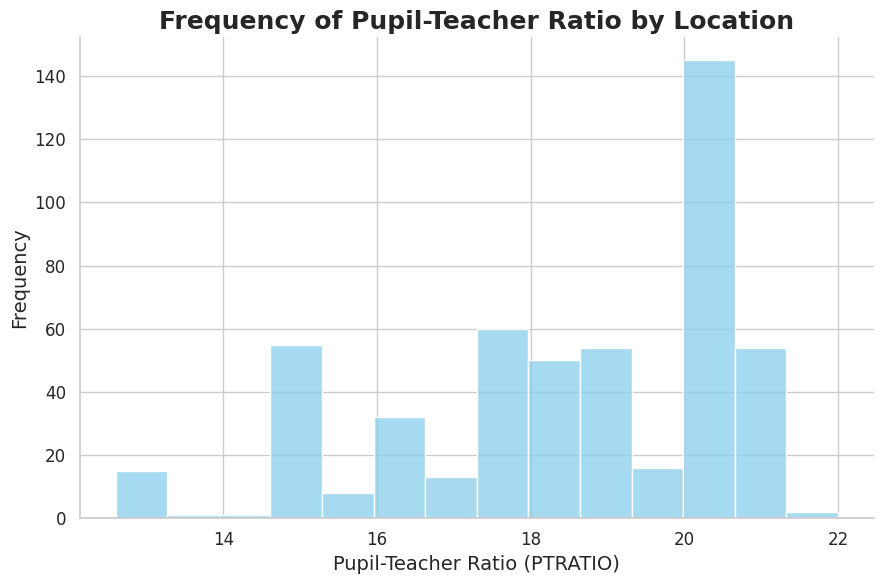

In [48]:

ax = sns.displot(boston_df['PTRATIO'], kde=False, height=6, aspect=1.5, color='skyblue')

# Set the title with improved formatting
plt.title('Frequency of Pupil-Teacher Ratio by Location', fontsize=18, fontweight='bold')

# Set the labels with improved formatting
plt.xlabel('Pupil-Teacher Ratio (PTRATIO)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set the ticks parameters for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
     

- From this plot we can see that most schools have a Pupil to Teacher RATIO around 20 students per teacher
- We can also see that almost all schools dont have a ratio under 15 and as high as 22
- It is most common for schools to have a ratio of around 15-20
- Our outlier of 13 could be a potential cause for concern due to the disparity 


Task #3: Use the appropriate tests to answer the questions provided.
For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.
Use α = 0.05
Perform the test Statistics.
State the conclusion from the test.
Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [50]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Based on the t-test results, we can conclude that there is a significant difference in the median value of houses bounded by the Charles River compared to those that are not. Specifically, houses near the river tend to hace higher median values.

In [ ]:
# Categorizing 
boston_df.loc[(boston_df['AGE'] <= 40), 'AGE_group'] = '40 years and younger'
boston_df.loc[(boston_df['AGE'] > 40)&(boston_df['AGE'] < 57), 'AGE_group'] = 'between 40 and 57 years'
boston_df.loc[(boston_df['AGE'] >= 57), 'AGE_group'] = '57 years and older'

In [ ]:

scipy.stats.levene(boston_df[boston_df['AGE_group'] == '40 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_group'] == 'between 40 and 57 years']['MEDV'], 
                   boston_df[boston_df['AGE_group'] == '57 years and older']['MEDV'], 
                   center='mean')

Conlusion:
The p-value is 0.0555, which is sligthly above the commom significance level of 0.05. This means that there is not enough evidence to reject the null hypothesis that the variances are equal across the age groups.

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

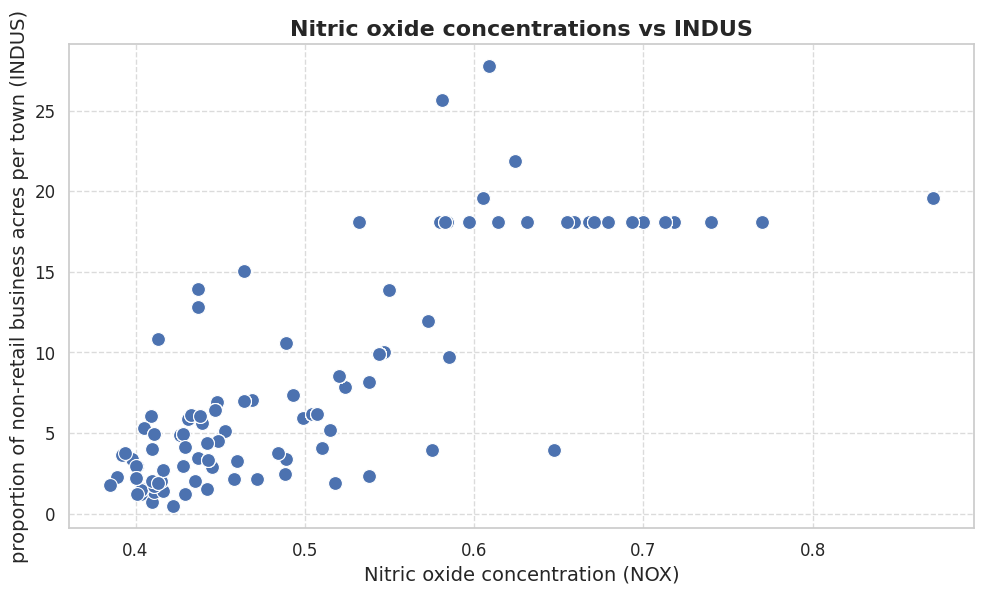

In [51]:
##to see the data of the variables in the following chart
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df, edgecolor='w', s=100)

#Setting the title
ax.set_title('Nitric oxide concentrations vs INDUS', fontsize=16, fontweight='bold')

#Setting the x label and the y  label
ax.set_xlabel('Nitric oxide concentration (NOX)', fontsize=14)
ax.set_ylabel('proportion of non-retail business acres per town (INDUS)', fontsize=14)

# Altering the appearance of our graph to look the best
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjusting the linestyle
ax.grid(True, linestyle='--', alpha=0.7)

# Adjusting the layout to better fit our data
plt.tight_layout()

# Showing our graph
plt.show()
     

Conlusion:
We can conclude that there is a significant psotivie relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [52]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7,between 35 and 70 years
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9,between 35 and 70 years
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1,70 years and older
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5,70 years and older
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9,70 years and older


In [53]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        18:15:48   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conlusion:
While houses further from employment centers tend to be more expensive on average, this model suggests distance is just one piece of the puzzle. Other factors likely play a larger role in determining the median value of owner-occupied homes.